In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,row_id,user _id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.info()
df['test_group'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   row_id         588101 non-null  int64 
 1   user _id       588101 non-null  int64 
 2   test_group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total_ads      588101 non-null  int64 
 5   most_ads_day   588101 non-null  object
 6   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


,count
test_group,
ad,564577
psa,23524


In [4]:
control = df[df['test_group'] == 'control']

test = df[df['test_group'] == 'test']

In [5]:
control_conv = control['converted']
test_conv = test['converted']

In [6]:
control_rate = control_conv.mean()
test_rate = test_conv.mean()

control_rate, test_rate

(nan, nan)

In [7]:
contingency_table = pd.crosstab(df['test_group'], df['converted'])
contingency_table

converted,False,True
test_group,,
ad,550154,14423
psa,23104,420


In [8]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
p_value

np.float64(1.9989623063390075e-13)

In [12]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['test_group'], df['converted'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

np.float64(1.9989623063390075e-13)

In [11]:
stats.ttest_ind(control['converted'], test['converted'])

TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [13]:
import numpy as np

# conversion rates
p1 = df[df['test_group']=='ad']['converted'].mean()
p2 = df[df['test_group']=='psa']['converted'].mean()

# sample sizes
n1 = df[df['test_group']=='ad'].shape[0]
n2 = df[df['test_group']=='psa'].shape[0]

# difference
diff = p1 - p2

# standard error
se = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))

# 95% confidence interval
lower = diff - 1.96 * se
upper = diff + 1.96 * se

diff, lower, upper

(np.float64(0.007692453192201517),
 np.float64(0.00595090043017032),
 np.float64(0.009434005954232714))

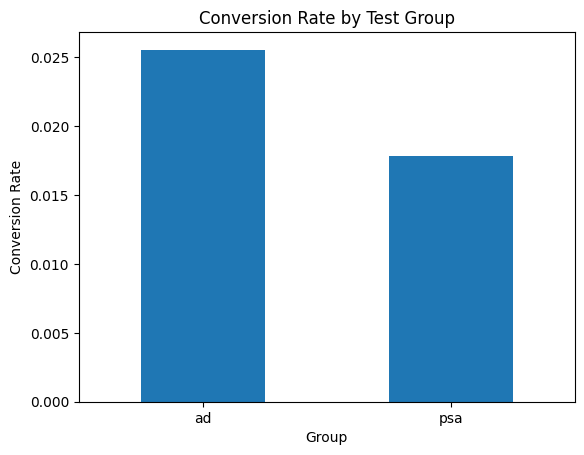

In [14]:
import matplotlib.pyplot as plt

# Calculate conversion rates
conversion_rates = df.groupby('test_group')['converted'].mean()

# Plot
conversion_rates.plot(kind='bar')
plt.title('Conversion Rate by Test Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

🔍 Final Decision
Based on the A/B test analysis, the ad group shows a higher conversion rate than the PSA (control) group.
The chi-square test produced a statistically significant p-value (< 0.05), and the 95% confidence interval for the difference in conversion rates does not include zero.
This confirms that the observed improvement in conversions is not due to random chance.

💼 Business Recommendation
Continue running advertisements, as they significantly improve user conversion.
Allocate more budget toward the ad strategy, especially in high-traffic segments.
Monitor performance over time to ensure the effect remains consistent.
Future tests can optimize ad creatives, timing, or audience targeting to further increase conversions

In [16]:
summary = df.groupby('test_group').agg(
    total_users = ('converted', 'count'),
    conversions = ('converted', 'sum'),
    conversion_rate = ('converted', 'mean')
).reset_index()

summary

,test_group,total_users,conversions,conversion_rate
0,ad,564577,14423,0.025547
1,psa,23524,420,0.017854


In [17]:
summary.to_csv('Ab_test_summary.csv', index=False)